#Visualizing data with analogies with t-SNE.

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 150 samples in 0.000s...
[t-SNE] Computed neighbors for 150 samples in 0.043s...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 0.509910
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.972595
[t-SNE] KL divergence after 1000 iterations: 0.124735
11490434/11490434 [==============================] - 0s 0us/step
(3000, 28, 28)
(3000, 784)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.001s...
[t-SNE] Computed neighbors for 3000 samples in 0.602s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 607.882415
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.372421
[t-SNE] KL divergence after 1000 iterations: 1.278991


[Text(0.5, 1.0, 'MNIST data T-SNE projection')]

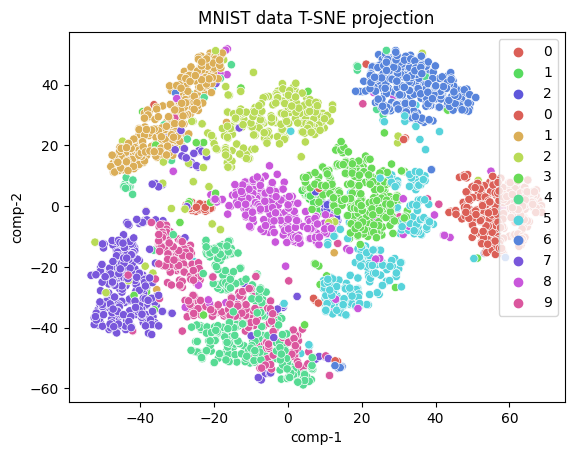

In [1]:
from sklearn.manifold import TSNE
from keras.datasets import mnist
from sklearn.datasets import load_iris
from numpy import reshape
import seaborn as sns
import pandas as pd

iris = load_iris()
x = iris.data
y = iris.target

tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x)
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 3),
                data=df).set(title="Iris data T-SNE projection")

(x_train, y_train), (_ , _) = mnist.load_data()
x_train = x_train[:3000]
y_train = y_train[:3000]
print(x_train.shape)

x_mnist = reshape(x_train, [x_train.shape[0], x_train.shape[1]*x_train.shape[2]])
print(x_mnist.shape)

tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x_mnist)

df = pd.DataFrame()
df["y"] = y_train
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 10),
                data=df).set(title="MNIST data T-SNE projection")
